In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
## the data is bank market data,the classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)?
 

# 1) Load Data
X_train= pd.read_csv('bank.csv', sep=';')
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [41]:
X_train['education'].describe()

count          4521
unique            4
top       secondary
freq           2306
Name: education, dtype: object

In [ ]:
#2 below is an histgram for education variable
#it looks like eduacation do play a role in the subscribe a term deposit

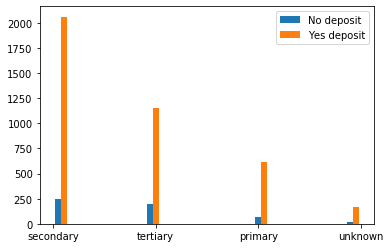

In [50]:
dfno=X_train[X_train['y']!='no']
dfyes=X_train[X_train['y']!='yes']

plt.hist([dfno['education'], dfyes['education']], bins=20, label=['No deposit', 'Yes deposit'])

plt.legend(loc='upper right')
plt.show()

In [45]:
#3)null hypothesis: the housing loan doens't have an significant infulence on term deposit.
# the p value is smaller than 0.05, so the hypothis is rejected, the housing do have significant influence on term deposit


houseyy=len(X_train[(X_train['housing']=='yes') & (X_train['y']=='yes')])
houseyy
houseyn=len(X_train[(X_train['housing']=='yes') & (X_train['y']=='no')])
#houseyu=len(X_train[(X_train['housing']=='unknown') & (X_train['y']=='yes')])
houseny=len(X_train[(X_train['housing']=='no') & (X_train['y']=='yes')])
housenn=len(X_train[(X_train['housing']=='no') & (X_train['y']=='no')])
#housenu=len(X_train[(X_train['housing']=='unknown') & (X_train['y']=='no')])
#houseuy=len(X_train[(X_train['housing']=='yes') & (X_train['y']=='unknown')])
#houseun=len(X_train[(X_train['housing']=='no') & (X_train['y']=='unknown')])
#houseuu=len(X_train[(X_train['housing']=='unknown') & (X_train['y']=='unknown')])

In [46]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[houseyy, houseyn], [houseny, housenn]])
pvalue

2.6901953046637094e-12

In [ ]:
#4) null hypothesis: the loan has no significenat infulence on term deposit.
#p value is smaller, the loan do has some correlations on y

In [47]:
loanyy=len(X_train[(X_train['loan']=='yes') & (X_train['y']=='yes')])
loanyy
loanyn=len(X_train[(X_train['loan']=='yes') & (X_train['y']=='no')])

loanny=len(X_train[(X_train['loan']=='no') & (X_train['y']=='yes')])
loannn=len(X_train[(X_train['loan']=='no') & (X_train['y']=='no')])

In [48]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[loanyy, loanyn], [loanny, loannn]])
pvalue

5.38554352157551e-07

In [ ]:
#5)pairplot shows, there is some correlations between balance and subscribe a term deposit.
# we set an hypothesis,if the balance lower than 10000 then yes to subscribe, otherwise will be no,but pvalue is >0.05, so that means there is no significent difference between them.

<function matplotlib.pyplot.show(*args, **kw)>

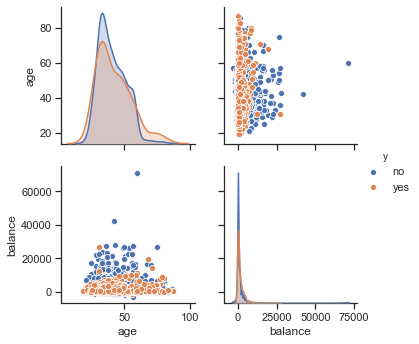

In [97]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(X_train,vars=["age",'balance'],hue='y')
plt.show

In [104]:
balanceyy= len(X_train[(X_train['balance']<10000) & (X_train['y']=='yes')])
balanceyn= len(X_train[(X_train['balance']<10000) & (X_train['y']=='no')])
balanceny= len(X_train[(X_train['balance']>=10000) & (X_train['y']=='yes')])
balancenn= len(X_train[(X_train['balance']>=10000) & (X_train['y']=='no')])
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[balanceyy,balanceyn], [balanceny, balancenn]])
pvalue

0.06879184639260119